In [2]:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

# persist the model and the scaler
import joblib

# visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("Downloads\housing_train.csv")

data.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,1,1,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
1,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2.0,1,1,1,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.3755,-86.8045,al
2,7041966914,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,825,apartment,1133,1,1.5,1,1,1,0,0,0,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
3,7041966936,https://bham.craigslist.org/apa/d/birmingham-f...,birmingham,https://bham.craigslist.org,800,apartment,927,1,1.0,1,1,1,0,0,0,laundry on site,street parking,https://images.craigslist.org/00808_6ghZ8tSRQs...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
4,7041966888,https://bham.craigslist.org/apa/d/birmingham-2...,birmingham,https://bham.craigslist.org,785,apartment,1047,2,1.0,1,1,1,0,0,0,laundry on site,street parking,https://images.craigslist.org/00y0y_21c0FOvUXm...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al


In [4]:
data.shape

(265190, 22)

In [5]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

In [6]:
data.isnull().sum()

id                             0
url                            0
region                         0
region_url                     0
price                          0
type                           0
sqfeet                         0
beds                           0
baths                          0
cats_allowed                   0
dogs_allowed                   0
smoking_allowed                0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
laundry_options            54311
parking_options            95135
image_url                      0
description                    2
lat                         1419
long                        1419
state                          1
dtype: int64

In [7]:
data.isna().mean().sort_values(ascending=False)

parking_options            0.358743
laundry_options            0.204800
lat                        0.005351
long                       0.005351
description                0.000008
state                      0.000004
beds                       0.000000
url                        0.000000
region                     0.000000
region_url                 0.000000
price                      0.000000
type                       0.000000
sqfeet                     0.000000
dogs_allowed               0.000000
baths                      0.000000
cats_allowed               0.000000
smoking_allowed            0.000000
wheelchair_access          0.000000
electric_vehicle_charge    0.000000
comes_furnished            0.000000
image_url                  0.000000
id                         0.000000
dtype: float64

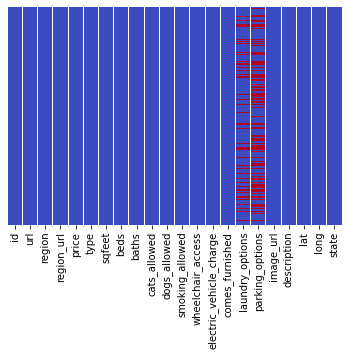

In [8]:
import seaborn as sns

sns.heatmap(data.isnull(), yticklabels=False, cbar=False,cmap='coolwarm')

#### Summary of dataset

In [9]:
data.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,2.651900e+05,2.651900e+05,2.651900e+05,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,263771.000000,263771.000000
mean,7.040888e+09,1.227285e+04,1.093678e+03,1.912414,1.483468,0.716822,0.696550,0.733896,0.078759,0.014360,0.048644,37.208855,-92.398149
std,8.778930e+06,5.376352e+06,2.306888e+04,3.691900,0.630208,0.450543,0.459749,0.441920,0.269362,0.118968,0.215124,5.659648,17.370780
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035963e+09,8.170000e+02,7.520000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.508500,-104.704000
50%,7.043109e+09,1.060000e+03,9.500000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.984900,-86.478300
75%,7.048362e+09,1.450000e+03,1.156000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.168400,-81.284600
max,7.051263e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


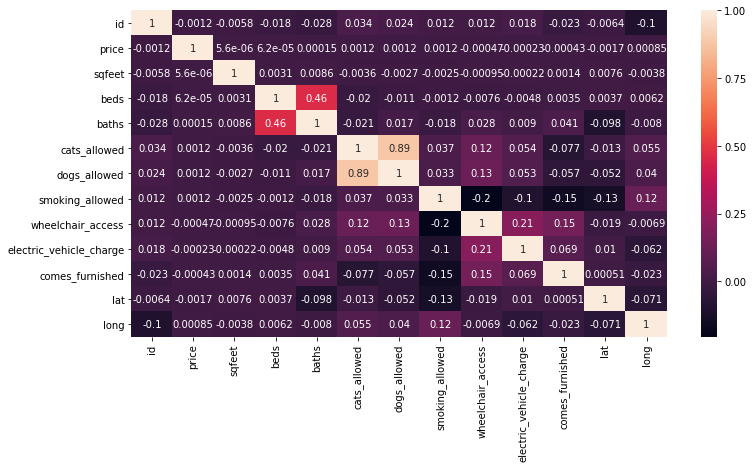

In [10]:
plt.figure(figsize=(12,6)) 
sns.heatmap(data.corr(), annot=True)

## Data Cleaning

#### Creating new features from already existing features. Also exploring the description for more insightful features

In [11]:
data['premium_house'] = np.where((data['baths']>=data['beds'])&(data['beds']>1),1,0)
data['pets_allowed'] = np.where((data['cats_allowed']==1)&data['dogs_allowed']==1,1,0)


data['beds_per_sqfeet'] = data.apply(lambda x: (x.beds / x.sqfeet) if x.sqfeet != 0 else 0, axis=1)
data['baths_per_beds'] = data.apply(lambda x: (x.baths / x.beds) if x.beds != 0 else 0, axis=1)


data = data.dropna(subset=['description','state'],axis=0)


data['has_pool'] = data['description'].apply(
    lambda x: 1 if 'pool' in x.lower() 
    or 'swimming' in x.lower() 
    else 0)

data['has_grill'] = data['description'].apply(
    lambda x: 1 if 'grill' in x.lower() 
    or 'grilling' in x.lower() 
    else 0)

data['has_fireplace'] = data['description'].apply(
    lambda x: 1 if 'fireplace' in x.lower() 
    or 'fire pits' in x.lower() 
    else 0)

data['gym_nearby'] = data['description'].apply(
    lambda x: 1 if 'gym' in x.lower() 
    or 'fitness' in x.lower() 
    else 0)

data['school/clg_nearby'] = data['description'].apply(
    lambda x: 1 if 'school' in x.lower() 
    or 'college' in x.lower() 
    else 0)

data['wifi_facilities'] = data['description'].apply(
    lambda x: 1 if 'wifi' in x.lower() 
    or 'wi-fi' in x.lower() 
    else 0)

data['valet_service'] = data['description'].apply(
    lambda x: 1 if 'valet' in x.lower() 
    else 0)

data['shopping_nearby'] = data['description'].apply(
    lambda x: 1 if 'shopping' in x.lower() 
    else 0)

data['sports_playground'] = data['description'].apply(
    lambda x: 1 if 'sport' in x.lower()  
    or 'sports' in x.lower() 
    or 'tennis' in x.lower() 
    or 'soccer' in x.lower() 
    or 'soccers' in x.lower() 
    or 'court' in x.lower() 
    else 0)

data['dining_nearby'] = data['description'].apply(
    lambda x: 1 if 'dining' in x.lower() 
    else 0)

## Outliers

#### In EDA, we decided to remove outliers according to the upper and lower bound of its interquartile range.

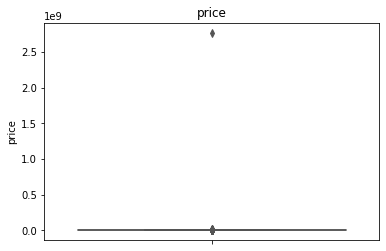

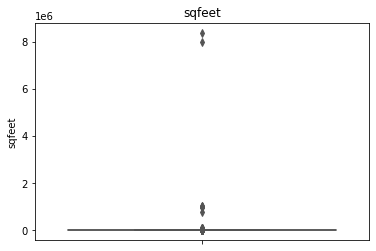

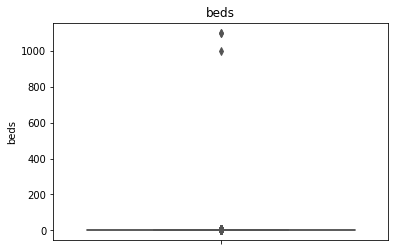

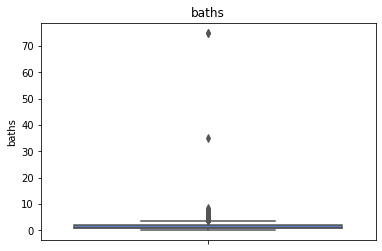

In [12]:
import seaborn as sns

# let's make boxplots to visualise outliers in the continuous variables

out_vars = ['price','sqfeet','beds','baths']

def find_outliers(df, var):
    df = df.copy()

    # log transform the variable
    df[var] = np.log1p(df[var])
    ax = sns.boxplot(x=data[var], palette="muted", orient="vertical")
    plt.title(var)
    plt.ylabel(var)
    plt.show()


for var in out_vars:
    find_outliers(data, var)

In [13]:
outliers_vars = ['sqfeet', 'price', 'beds', 'baths']

In [14]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    return np.ceil(q25 - cut_off), np.ceil(q75 + cut_off)
#     return lower, upper

In [15]:
for var in outliers_vars:
    _, upper = out_iqr(data, var)
    lower = 1
    data = data[(data[var] <= upper) & (data[var] >= lower)]

## Categorical variables
#### For categorical variables, we will replace missing values with the mode of relevant features

In [16]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state', 'premium_house', 'pets_allowed', 'beds_per_sqfeet',
       'baths_per_beds', 'has_pool', 'has_grill', 'has_fireplace',
       'gym_nearby', 'school/clg_nearby', 'wifi_facilities', 'valet_service',
       'shopping_nearby', 'sports_playground', 'dining_nearby'],
      dtype='object')

In [17]:
data.isna().mean().sort_values(ascending=False)

parking_options            0.368638
laundry_options            0.205216
lat                        0.004608
long                       0.004608
cats_allowed               0.000000
comes_furnished            0.000000
electric_vehicle_charge    0.000000
wheelchair_access          0.000000
smoking_allowed            0.000000
dogs_allowed               0.000000
dining_nearby              0.000000
beds                       0.000000
sqfeet                     0.000000
type                       0.000000
price                      0.000000
region_url                 0.000000
region                     0.000000
url                        0.000000
baths                      0.000000
image_url                  0.000000
sports_playground          0.000000
description                0.000000
state                      0.000000
premium_house              0.000000
pets_allowed               0.000000
beds_per_sqfeet            0.000000
baths_per_beds             0.000000
has_pool                   0

In [18]:
# make a list of the categorical variables that contain missing values
cat_var_na = ['laundry_options', 'parking_options']

In [19]:
def impute_missing_cat(data, vars, replace_by='type'):
    for var in vars:
        data[var] = data.groupby(replace_by)[var].transform(
                    lambda x: x.fillna(x.mode()[0]))
    return data

data = impute_missing_cat(data,cat_var_na)


# check that we have no missing information in the engineered variables
data[cat_var_na].isnull().sum()

laundry_options    0
parking_options    0
dtype: int64

In [20]:
# make a list of the numerical variables that contain missing values:
num_var_na = ['lat', 'long']

In [21]:
# replace missing values by the mean
for var in num_var_na:
    data[var] = data.groupby('region')[var].transform(
                    lambda x: x.fillna(x.mode()[0]))
    
# check that we have no missing information in the engineered variables
data[num_var_na].isnull().sum()

lat     0
long    0
dtype: int64

In [22]:
for var in ['price','sqfeet','baths_per_beds','beds_per_sqfeet']:
    data[var] = np.log(data[var])

In [23]:
# check that data set does not contain null values in the engineered variables
[var for var in ['price','sqfeet','baths_per_beds','beds_per_sqfeet'] if data[var].isnull().sum() > 0]

[]

In [24]:
# let's capture the categorical variables in a list

cat_vars = ['region', 'type', 'laundry_options', 'parking_options', 'state']

In [25]:
def find_frequent_labels(df, var, rare_perc):
    
    # function finds the labels that are shared by more than
    # a certain % of the houses in the dataset

    df = df.copy()

    tmp = df.groupby(var)['price'].count() / len(df)

    return tmp[tmp > rare_perc].index


for var in cat_vars:
    
    # find the frequent categories
    frequent_ls = find_frequent_labels(data, var, 0.01)
    # replace rare categories by the string "Rare"
    data[var] = np.where(data[var].isin(
        frequent_ls), data[var], 'Rare')

## Encoding of categorical variables

In [26]:
# this function will assign discrete values to the strings of the variables,
# so that the smaller value corresponds to the category that shows the smaller
# mean house sale price


def replace_categories(data, var, target):

    # order the categories in a variable from that with the lowest
    # house sale price, to that with the highest
    ordered_labels = data.groupby([var])[target].mean().sort_values().index
    # create a dictionary of ordered categories to integer values
    ordinal_label = {k: i for i, k in enumerate(ordered_labels, 0)}
    # use the dictionary to replace the categorical strings by integers
    data[var] = data[var].map(ordinal_label)

In [27]:
for var in cat_vars:
    replace_categories(data, var, 'price')

# check absence of na in the train set
[var for var in data.columns if data[var].isnull().sum() > 0]

data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state', 'premium_house', 'pets_allowed', 'beds_per_sqfeet',
       'baths_per_beds', 'has_pool', 'has_grill', 'has_fireplace',
       'gym_nearby', 'school/clg_nearby', 'wifi_facilities', 'valet_service',
       'shopping_nearby', 'sports_playground', 'dining_nearby'],
      dtype='object')

In [28]:
features = ['region', 'price', 'type', 'sqfeet', 'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge', 
            'comes_furnished', 'laundry_options', 'parking_options','lat', 'long', 'state', 
            'premium_house', 'pets_allowed', 'beds_per_sqfeet', 'baths_per_beds', 'has_pool', 'has_grill', 
            'has_fireplace', 'gym_nearby', 'school/clg_nearby', 'wifi_facilities', 'valet_service', 'shopping_nearby', 
            'sports_playground', 'dining_nearby']

data_final = data[features].copy()
data_final.head()

,region,price,type,sqfeet,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state,premium_house,pets_allowed,beds_per_sqfeet,baths_per_beds,has_pool,has_grill,has_fireplace,gym_nearby,school/clg_nearby,wifi_facilities,valet_service,shopping_nearby,sports_playground,dining_nearby
1,7,7.021084,3,7.184629,1,0,0,0,1,0,33.3755,-86.8045,7,0,1,-6.086017,-0.405465,0,0,0,0,1,0,0,1,0,0
2,7,6.715383,3,7.032624,1,0,0,0,1,1,33.4226,-86.7065,7,0,1,-7.032624,0.405465,1,1,1,1,1,0,1,1,1,1
3,7,6.684612,3,6.831954,1,0,0,0,1,1,33.4226,-86.7065,7,0,1,-6.831954,0.000000,1,1,1,1,1,0,1,1,1,1
4,7,6.665684,3,6.953684,1,0,0,0,1,1,33.4226,-86.7065,7,0,1,-6.260537,-0.693147,1,1,1,1,1,0,1,1,1,1
5,7,6.802395,3,7.168580,1,0,0,0,1,1,33.4226,-86.7065,7,1,1,-6.475433,0.000000,1,1,1,0,1,0,1,1,1,1


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
                                    data_final.drop('price',axis=1),
                                    data_final['price'],
                                    test_size=0.25,
                                    random_state=0)

## Random Forest Regressor
#### Model Training

In [30]:
# set up the model
# remember to set the random_state / seed

rf = RandomForestRegressor(n_estimators=200,
                           random_state=101)

# train the model
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=101, verbose=0, warm_start=False)

In [31]:
rf_pred_train = rf.predict(X_train)
rf_pred_test = rf.predict(X_test)

Random Forest Performance:

all features, No scaling(train):
Train MSE: 3691.2651546166044
Train RMSE: 0.08523850418318868
Train MAE: 0.027639693493224614
R2_Score:  0.969464533025093

all features, No scaling(test):
Test MSE: 18163.352935010415
Test RMSE: 0.18750125675971663
Test MAE: 0.060049025843388636
R2_Score:  0.8532812813885348


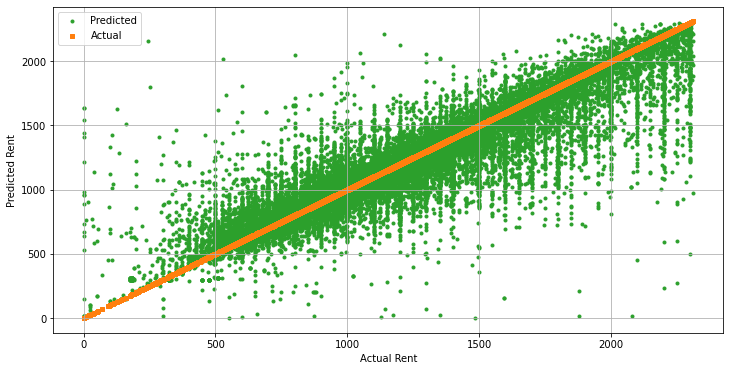

In [32]:
print('Random Forest Performance:')

print('\nall features, No scaling(train):')
print('Train MSE:', mean_squared_error(np.exp(y_train), np.exp(rf_pred_train)))
print('Train RMSE:', np.sqrt(mean_squared_error(y_train, rf_pred_train)))
print('Train MAE:', mean_absolute_error(y_train, rf_pred_train))
print('R2_Score: ', r2_score(y_train, rf_pred_train))

print('\nall features, No scaling(test):')
print('Test MSE:', mean_squared_error(np.exp(y_test), np.exp(rf_pred_test)))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, rf_pred_test)))
print('Test MAE:', mean_absolute_error(y_test, rf_pred_test))
print('R2_Score: ', r2_score(y_test, rf_pred_test))


# pred = pd.DataFrame(data={'Predicted_Rent': np.exp(rf_pred_test), 'Actual_Rent': np.exp(y_test)})

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(np.exp(y_test), np.exp(rf_pred_test), color='tab:green', marker=".", label='Predicted')
ax1.scatter(np.exp(y_test), np.exp(y_test), s=10, color='tab:orange', marker="s", label='Actual')


plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.legend(loc='upper left');
plt.grid()
plt.show()

## Thank You